# Curve Fitting

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
data=np.genfromtxt(
    "data/pendulum-lengths-periods.csv",
    delimiter=',',
    skip_header=True
)
lengths = data[:,0]/100 # unit: meter
n = len(lengths)
periods = np.zeros(n)
std_errors = np.zeros(n)
for i in range(n):
    periods[i] = np.mean(data[i,1:]) #unit: s
    std_errors[i] = np.std(data[i,1:],ddof=1)/np.sqrt(5) # s

## Curve fitting (Parameter extraction)

#### `curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False)`

* `f`: function you use to fit the data
* `p0`: initial guess of the parametrs
* `sigma`: standard erros
* `absolute_sigma`: True if your standard error has unit; False if you only care about the relative magnitude.

In [3]:
# model 1
T = lambda l,g: 2*np.pi*np.sqrt(l/g)
param, cov = curve_fit(T,lengths,periods,
         p0=[9.8],sigma=std_errors,absolute_sigma=True)
print(f"estimation: g={param[0]}±{np.sqrt(cov[0,0])}")

estimation: g=9.771880921470423±0.00015539078237981934


estimation(on report): $$ g=9.7719 \pm 0.0002 m/s^2$$  

In [4]:
# model 2
theta0 = 10*np.pi/180 # unit: radians 
T = lambda l,g: 2*np.pi*np.sqrt(l/g)*(1 + 1/16 * theta0**2)
param, cov = curve_fit(T,lengths,periods,
         p0=[9.8],sigma=std_errors,absolute_sigma=True)
print(f"estimation: g={param[0]}±{np.sqrt(cov[0,0])}")

estimation: g=9.809124905803717±0.00015598302765194367


estimation(on report): $$ g=9.8091 \pm 0.0002 m/s^2$$

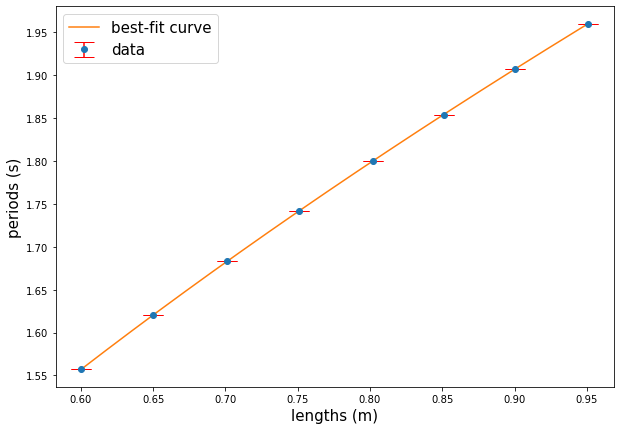

In [5]:
plt.figure(figsize=(10,7))
# plot data points
plt.errorbar(lengths,periods,yerr=std_errors, 
             fmt='o', capsize=10, ecolor='r',
            label="data")
plt.xlabel("lengths (m)", fontsize=15)
plt.ylabel("periods (s)", fontsize=15)

x = np.linspace(min(lengths), max(lengths), 5000)
y = T(x, param[0])
plt.plot(x,y, label="best-fit curve");
plt.legend(fontsize=15);

## Goodness of fit (reduced $\chi^2$)
1. Residuals:
$$ r_i = y_i - \hat{y}(x_i) $$
where $y_i$ are data points, $\hat{y}(x_i)$ are points generated by your model.

2. Normalized residuals:
$$ R_i = \frac{r_i}{\alpha_i} $$
3. $\chi^2$ statistic:
$$\chi^2 = \sum_{i=1}^n R_i^2$$
4. degrees of freedom:
$$ \nu = \text{number of data points} - \text{number of parameters} $$
5. Reduced chi-square $\chi_\nu^2$:
$$ \chi_\nu^2 = \frac{\chi^2}{\nu} $$

* $\chi_\nu^2 \approx 1$: Good!
* $\chi_\nu^2 << 1$: check your calculations for the uncertainties in the measurements, $\alpha_i$. 
* $\chi_\nu^2 > 2$: Model might be incorrect if $\nu\approx 10$.
* $\chi_\nu^2 > 1.5$: Model might be incorrect if $50 \leq \nu \leq 100$.


In [21]:
# calculate chi-square
res = periods - T(lengths, param[0])
normres = res/std_errors
chisq = np.sum(normres**2)
print(f"chi-square = {chisq}")

# degree of freedom
Ndata = np.size(periods)
Npar = 1
dof = Ndata - Npar
print(f"dof = {dof}")

# reduced chi-square
chisq_r = chisq/dof
print(f"reduced chi square = {chisq_r}")

chi-square = 12.683446152283974
dof = 7
reduced chi square = 1.8119208788977106


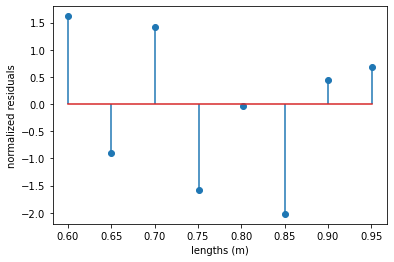

In [22]:
# plot normalized residuals
plt.stem(lengths,normres)
plt.xlabel("lengths (m)")
plt.ylabel("normalized residuals");